In [1]:
import pandas as pd
import numpy as np
from graph_tool.all import *
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/convfefe_network/convfefe_network.csv', header=None)
df.head()

0      1
0   8240   2840
1   6058  13005
2  11636   4616
3   1544  13829
4   1438    223

In [3]:
df.shape

(1011, 2)

In [4]:
g = Graph(directed=False)
g.add_edge_list((item for item in df.values.tolist()))

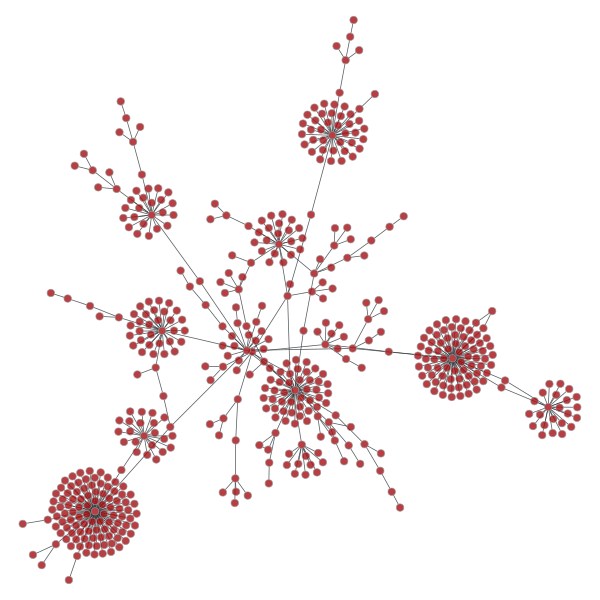

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fd73e2f38d0, at 0x7fd73e306550>

In [5]:
l = label_largest_component(g)
u = GraphView(g, vfilt=l)

graph_draw(u)

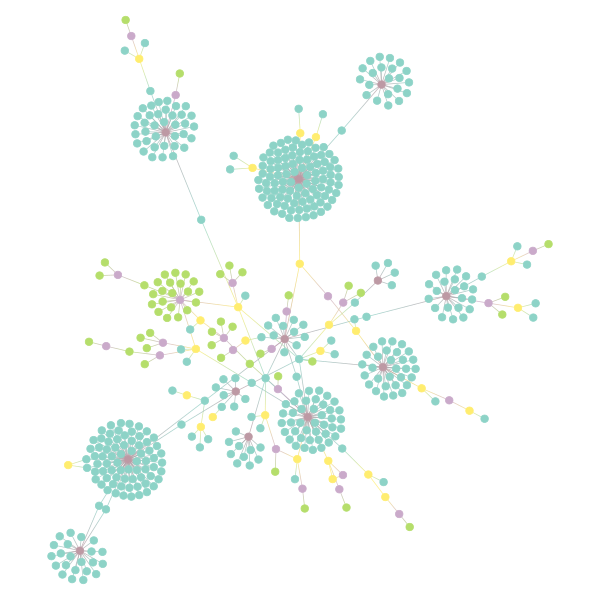

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fd73e2f38d0, at 0x7fd73e2c6780>

In [6]:
state = minimize_blockmodel_dl(u, B_min=5)
state.draw()

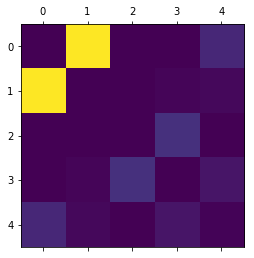

In [7]:
e = state.get_matrix()
plt.matshow(e.todense())

In [8]:
blocks = state.get_blocks()
groups = {i: blocks[i] for i in u.vertex_index}
list(groups.items())[:5]

[(18, 0), (26, 0), (68, 0), (82, 0), (90, 0)]

In [9]:
names = pd.read_csv('data/convfefe_network/convfefe_meta.csv')
names.head()

name
0      JoyBHoward
1    lifeisknutts
2      jgirlatlaw
3  RealTrumpMafia
4        Zakmag74

In [10]:
groups_dict = {group: [] for group in np.unique(list(groups.values()))}
for v_index, group in groups.items():
    groups_dict[group].append(names.loc[v_index]['name'])

In [11]:
for i, members in groups_dict.items():
    print(f'GROUP {i}:')
    print(', '.join(members), '\n')

GROUP 0:
CBIL6th, RightWingLawMan, MaryKalemkerian, AmericaWillSurv, Cuzz50, AngryAfricanBK, lilscud1974, RebeckaWrites, DaveA_33, thysmanbones, wwylles, HeydonMusic, SerenityMuszing, BEINGiShMART, Xerravon, NotcherBizness, Stay2Talk, noprezzie2012, itsEric, Dawn_Boyer, WINGSOBEAUTY, OhSusanaDana, yfequiere, patriotlaughter, RealSlimNOLA, josephcphillips, JPhoenixB, Srash001, ZSaint_13, daemondave, ATRadioInMyHead, remissyg, 1VeganMom, luvlyjamie, mainul_haque, realityinACTION, BiteMeYes, kurtisleeram, rebeccasheir, JudyBaldasaro, an_cailin_alt, CharlieReed2004, NyquillisDllwd, USRESISTNEWS, FoxKidsNation, Ou812Strong, MrMikeDavies, jackiejohn, Derrick_RP, ShaunBeacham, avery_day, cjtripnewton, sf49erbob, Tspinnerchaser, PayneCoDems, roxyhwdorsey93, Captain_Order, thBlackDouglas, thetexagonian, TITOR_DADISPEDO, SpaceISFun, tschabs21, jouvet86, icomixi, crookedHombre, GOPJustice, COCAnnMarie, notaproviderMD, PCheGuevara, JacquelinSusann, jbeam412, TheresaMilstein, sneakin, Robocuck, Tru

In [12]:
import pickle

with open('data/convfefe_network/convfefe_groups.pickle', 'wb') as handle:
    pickle.dump(groups_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Group 0:
- MaryKalemkerian is declared democrat
- sarah_devorah is Trump supporter
- Niniyako28 is against current president
- BernieBusNYC was selling t-shirts with anti-Trump phrases, now selling liberal texts t-shirt
- though e.g. MrMikeDavies, icomixi, VoteLouder is conservative

This group is a mix of conservatives and democrats, probably fighting with each other. No side seems to take advantage. 

### Group 1:
- JimmyKimmelLive, amjoyshow, WayneDupreeShow are either host or tv shows. 
- billmaher is also known comedian and used to be tv host.
- NPR, HuffPost is medium (news). SebGorka is associacted with FOXNews.

Overally we can say that this group consists of media-related person or platforms.

### Group 2:
- John_W_Marshall is used to Secretary of Public Safety in the Cabinet of Virginia
- USWorkers4Trump is a conservative think tank aimed at promoting President Trump and his efforts to lead the American worker to prosperity
- MrKimbles is Trump supported so is FrankieRusso1, TexasTrumpGirl, RobertMurdock11 ...
    
So we can see that this cluster consists of pro-Trump and government related people.

### Group 3:
 - AmStillNotYou is pro LGBT and against Trump
 - michaelbeatty3, reblblac are also against Trump
 - missjonieooaks is one of the greatest oppositionist
 - however WomenforTrump is definietly pro USA president
 
Though few misses this group consists of radical Trump opponents.

### Group 4:
 - kelliwardaz is for sure Trump supporter, so i LuvMyMitten
 - TrumpCardGames is kickstarter project - Trump related catd games witch makes fun out of him: https://youtu.be/Z4Rg1Xjz6t8
 - President1Trump and ScottAnthonyUSA are also conservatist
 
Most of persons in this group are radical conservatives and Trump supporters.